In [30]:
#Demo for the KNN algorithm for classification
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report       

In [31]:
#Load dataset
# X, y = load_iris(return_X_y=True)
X, y = load_wine(return_X_y=True)

In [32]:
X.shape, y.shape

((178, 13), (178,))

In [33]:
X[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [34]:
y[1]

0

In [35]:
#split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [64]:
best_acc=0
best_k=0
for i in range(1, 100):
    #Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    acc=accuracy_score(y_train, y_pred)
    print("Accuracy:", acc, "K:", i)
    if acc > best_acc:
        best_acc = acc
        best_k = i
print("Best K:", best_k)

Accuracy: 1.0 K: 1
Accuracy: 0.8732394366197183 K: 2
Accuracy: 0.8591549295774648 K: 3
Accuracy: 0.823943661971831 K: 4
Accuracy: 0.7535211267605634 K: 5
Accuracy: 0.7676056338028169 K: 6
Accuracy: 0.7676056338028169 K: 7
Accuracy: 0.795774647887324 K: 8
Accuracy: 0.7746478873239436 K: 9
Accuracy: 0.7676056338028169 K: 10
Accuracy: 0.7394366197183099 K: 11
Accuracy: 0.7394366197183099 K: 12
Accuracy: 0.7323943661971831 K: 13
Accuracy: 0.7323943661971831 K: 14
Accuracy: 0.7394366197183099 K: 15
Accuracy: 0.7394366197183099 K: 16
Accuracy: 0.7323943661971831 K: 17
Accuracy: 0.7253521126760564 K: 18
Accuracy: 0.7464788732394366 K: 19
Accuracy: 0.7323943661971831 K: 20
Accuracy: 0.7253521126760564 K: 21
Accuracy: 0.7253521126760564 K: 22
Accuracy: 0.7253521126760564 K: 23
Accuracy: 0.7112676056338029 K: 24
Accuracy: 0.7183098591549296 K: 25
Accuracy: 0.7183098591549296 K: 26
Accuracy: 0.7183098591549296 K: 27
Accuracy: 0.704225352112676 K: 28
Accuracy: 0.7183098591549296 K: 29
Accuracy: 0.

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [39]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Accuracy: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.92      0.79      0.85        14
           2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



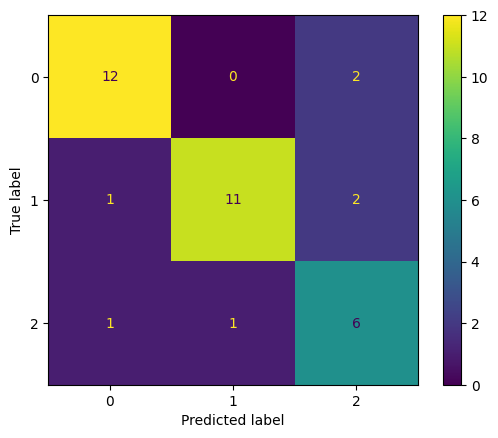

In [68]:
#Evaluate the model
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


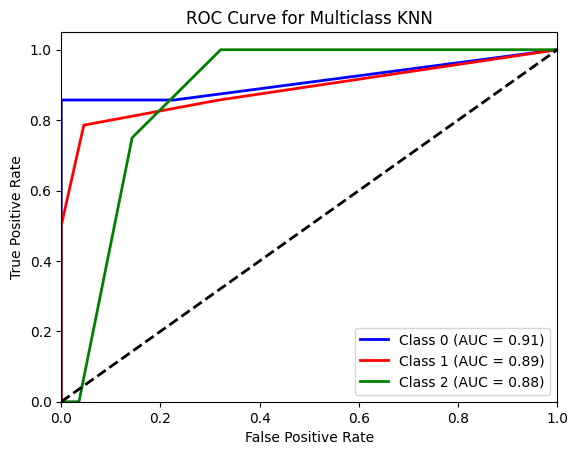

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels (multiclass to one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = knn.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ["blue", "red", "green"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass KNN")
plt.legend(loc="lower right")
plt.show()
